In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('datasets/train.csv')

Data from 2006 to 2010.
Time is highly volatile - multiply months by year and do one hot encoding.

In [3]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [34]:
# Data set appears to have no duplicates
df.drop(columns = ['Id','PID']).duplicated().any()

False

In [4]:
df.shape

(2051, 81)

VARIABLE DESCRIPTIONS:
Tab characters are used to separate variables in the data file. The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers).

<AxesSubplot:>

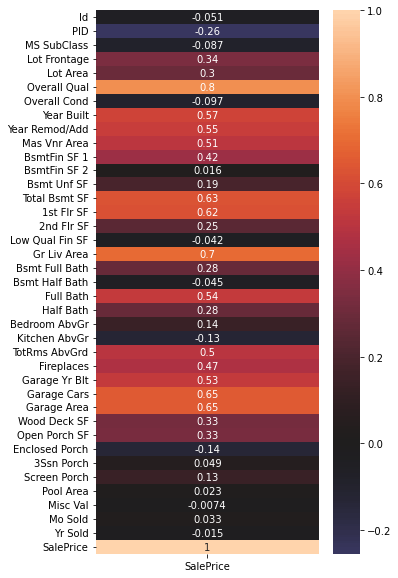

In [5]:
plt.figure(figsize = (5, 10))
sns.heatmap(df.corr()[['SalePrice']], center = 0, annot = True)

In [6]:
# Important cols
cols = ['Neighborhood', 'Overall Qual', 'Year Built', 'Gr Liv Area', 'Yr Sold', 'SalePrice', 'Garage Area']

In [7]:
df.groupby('Yr Sold').mean()[['SalePrice', 'Gr Liv Area']]

,SalePrice,Gr Liv Area
Yr Sold,,
2006,179471.609589,1486.000000
2007,185524.514056,1520.168675
2008,181750.372414,1511.188506
2009,182455.244395,1506.715247
2010,174180.059829,1443.811966


### EDA

1. Remove outliers for SalePrice
2. log-transform SalePrice

In [8]:
df.groupby('Neighborhood').agg([np.mean, len])[['SalePrice']].sort_values(by = ('SalePrice', 'len')).head(4)

SalePrice    
                       mean len
Neighborhood                   
Landmrk       137000.000000   1
GrnHill       280000.000000   2
Greens        188666.666667   3
Blueste       144566.666667   6

In [9]:
pd.reset_option('display.max_columns')
print(pd.get_option('display.max_columns'))

20


In [10]:
from IPython.display import display
def all_cols(df):
    with pd.option_context('display.max_columns', None):
        return display(df)

In [11]:
df.query('Neighborhood == "Landmrk"')[cols]

,Neighborhood,Overall Qual,Year Built,Gr Liv Area,Yr Sold,SalePrice,Garage Area
1121,Landmrk,6,1993,1320,2006,137000,484.0


In [12]:
df[cols].describe()

,Overall Qual,Year Built,Gr Liv Area,Yr Sold,SalePrice,Garage Area
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2050.000000
mean,6.112140,1971.708922,1499.330083,2007.775719,181469.701609,473.671707
std,1.426271,30.177889,500.447829,1.312014,79258.659352,215.934561
min,1.000000,1872.000000,334.000000,2006.000000,12789.000000,0.000000
25%,5.000000,1953.500000,1129.000000,2007.000000,129825.000000,319.000000
50%,6.000000,1974.000000,1444.000000,2008.000000,162500.000000,480.000000
75%,7.000000,2001.000000,1728.500000,2009.000000,214000.000000,576.000000
max,10.000000,2010.000000,5642.000000,2010.000000,611657.000000,1418.000000


In [13]:
all_cols(df.query('`Gr Liv Area` > 4000'))

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

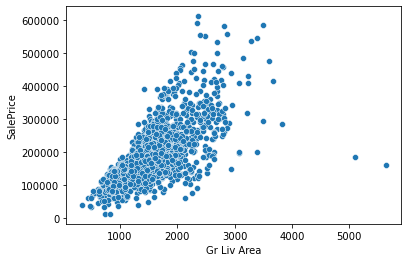

In [14]:
sns.scatterplot(data = df, x = 'Gr Liv Area', y = 'SalePrice')

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

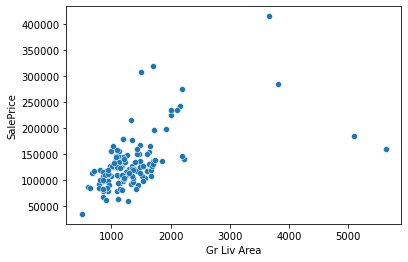

In [15]:
sns.scatterplot(data = df.query('Neighborhood == "Edwards"'), x = 'Gr Liv Area', y = 'SalePrice')

#### Make Sale price normally distributed

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

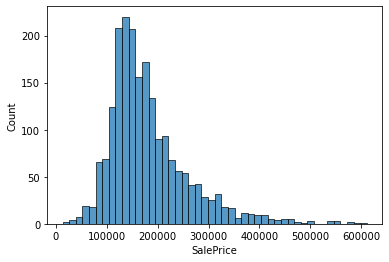

In [16]:
sns.histplot(df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

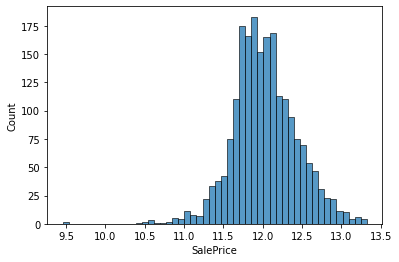

In [17]:
sns.histplot(np.log(df['SalePrice']))

In [18]:
df['SalePrice'].transform(np.log).clip(lower = 10.5)

0       11.779129
1       12.301383
2       11.599103
3       12.066811
4       11.838626
          ...    
2046    12.607366
2047    11.320554
2048    12.083905
2049    11.877569
2050    12.149502
Name: SalePrice, Length: 2051, dtype: float64

In [19]:
from scipy.stats import shapiro

In [20]:
shapiro(df['SalePrice'])

ShapiroResult(statistic=0.8883432149887085, pvalue=3.7981005229179894e-36)

In [21]:
shapiro(np.log(df['SalePrice']))

ShapiroResult(statistic=0.9815787076950073, pvalue=1.2794993827603763e-15)

In [22]:
shapiro(df['SalePrice'].transform(np.log).clip(lower = 10.5))

ShapiroResult(statistic=0.9892699122428894, pvalue=3.1876015715859296e-11)

In [23]:
df['LogPrice_clipped'] = np.log(df['SalePrice'])

In [24]:
df[['SalePrice', 'LogPrice_clipped']].agg([np.mean, np.std, np.var, pd.Series.skew]).T

,mean,std,var,skew
SalePrice,181469.701609,79258.659352,6.281935e+09,1.557551
LogPrice_clipped,12.024397,0.411316,1.691812e-01,-0.146816


2 entry features: e.g. Exterior

In [25]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [26]:
df['Exterior 1st'].value_counts()

VinylSd    724
MetalSd    331
HdBoard    300
Wd Sdng    276
Plywood    152
CemntBd     90
BrkFace     64
WdShing     45
AsbShng     33
Stucco      27
BrkComm      3
Stone        2
CBlock       2
ImStucc      1
AsphShn      1
Name: Exterior 1st, dtype: int64

In [27]:
df['Exterior 2nd'].value_counts()

VinylSd    721
MetalSd    324
HdBoard    275
Wd Sdng    262
Plywood    185
CmentBd     90
Wd Shng     63
BrkFace     34
Stucco      30
AsbShng     28
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: Exterior 2nd, dtype: int64

In [28]:
df['Mult Exterior'] = (df['Exterior 1st'] != df['Exterior 2nd'])

In [29]:
df['Mult Exterior'].value_counts()

False    1733
True      318
Name: Mult Exterior, dtype: int64